In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

magnitudes = ['velocidad_viento', 'dir_viento', 'temperatura', 'humedad_relativa', 'presion_barometrica', 'radiacion_solar', 'precipitacion']

## Análisis

In [77]:
df = pd.read_csv('files/procesados/21prepr.csv', parse_dates=['fecha'])
df = df[df.estacion==59].set_index('fecha')
df

,estacion,velocidad_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,radiacion_solar,precipitacion
fecha,,,,,,,,
2021-01-01 01:00:00,59.0,1.04,199.0,3.6,88.0,931.0,1.0,0.0
2021-01-01 02:00:00,59.0,0.84,119.0,3.6,85.0,930.0,1.0,0.0
2021-01-01 03:00:00,59.0,1.67,267.0,3.8,81.0,930.0,1.0,0.0
2021-01-01 04:00:00,59.0,1.62,5.0,3.5,83.0,930.0,1.0,0.0
2021-01-01 05:00:00,59.0,0.45,9.0,2.3,93.0,930.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2021-12-31 20:00:00,59.0,0.45,5.0,10.9,73.0,950.0,1.0,0.0
2021-12-31 21:00:00,59.0,0.35,3.0,9.3,80.0,950.0,1.0,0.0
2021-12-31 22:00:00,59.0,0.34,327.0,8.4,84.0,951.0,1.0,0.0


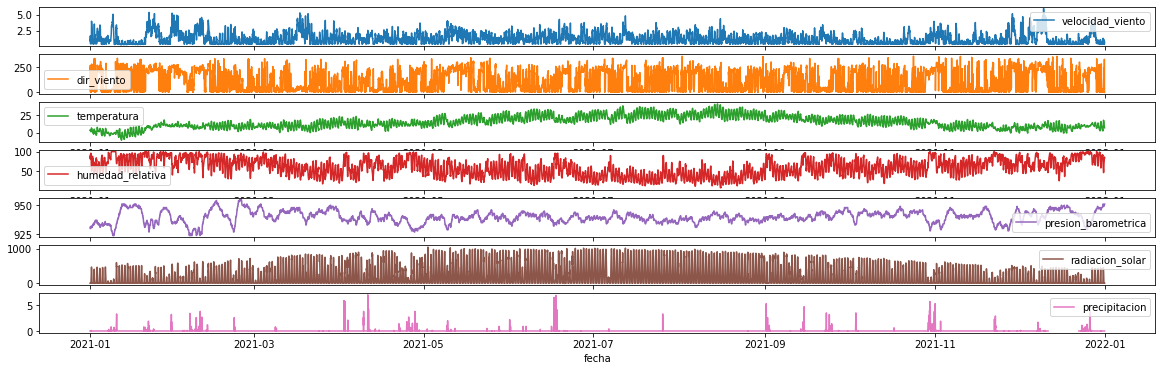

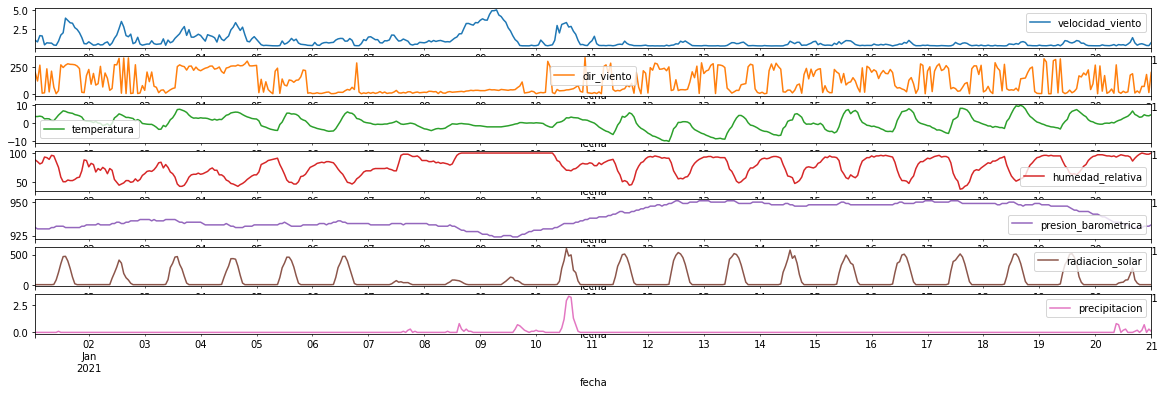

In [62]:
fig1, ax1 = plt.subplots(len(magnitudes), 1, figsize=(20, 6))
_ = df[magnitudes].plot(subplots=True, ax=ax1)

fig2, ax2 = plt.subplots(len(magnitudes), 1, figsize=(20, 6))
_ = df[magnitudes][:480].plot(subplots=True, ax=ax2)

In [63]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
estacion,9504.0,59.000000,0.000000,59.0,59.00,59.000,59.00,59.00
velocidad_viento,9500.0,1.216956,0.875109,0.3,0.50,0.965,1.68,5.97
dir_viento,9500.0,108.510842,99.493223,0.0,15.00,63.000,208.00,358.00
temperatura,9498.0,14.971805,8.329229,-10.4,9.00,14.200,20.60,40.80
humedad_relativa,9500.0,59.688316,21.959729,7.0,43.00,60.000,77.00,100.00
presion_barometrica,9500.0,940.032947,4.998101,924.0,937.00,940.000,943.00,955.00
radiacion_solar,9499.0,193.085588,278.374366,0.0,1.00,6.000,346.00,1052.00
precipitacion,9218.0,0.050683,0.364632,0.0,0.00,0.000,0.00,7.00
Unnamed: 0,744.0,11.500000,6.926843,0.0,5.75,11.500,17.25,23.00


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9504 entries, 2021-01-01 01:00:00 to 2022-01-01 00:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   estacion             9504 non-null   float64
 1   velocidad_viento     9500 non-null   float64
 2   dir_viento           9500 non-null   float64
 3   temperatura          9498 non-null   float64
 4   humedad_relativa     9500 non-null   float64
 5   presion_barometrica  9500 non-null   float64
 6   radiacion_solar      9499 non-null   float64
 7   precipitacion        9218 non-null   float64
 8   Unnamed: 0           744 non-null    float64
dtypes: float64(9)
memory usage: 742.5 KB


Text(0, 0.5, 'Velocidad viento [m/s]')

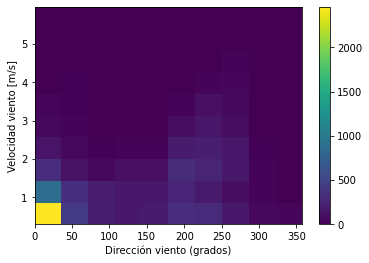

In [65]:
dff = df[df.dir_viento.notnull() & df.velocidad_viento.notnull()]
plt.hist2d(dff['dir_viento'], dff['velocidad_viento'])
plt.colorbar()
plt.xlabel('Dirección viento (grados)')
plt.ylabel('Velocidad viento [m/s]')

In [66]:
wv = df.pop('velocidad_viento')

# Convert to radians.
wd_rad = df.pop('dir_viento')*np.pi / 180

# Calculate the wind x and y components.
df['vientox'] = wv*np.cos(wd_rad)
df['vientoy'] = wv*np.sin(wd_rad)

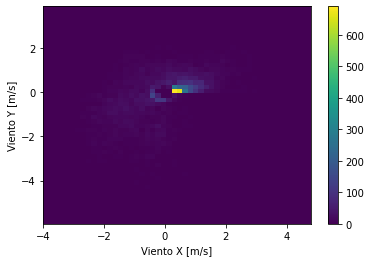

In [67]:
dff = df[df.vientox.notnull() & df.vientoy.notnull()]
plt.hist2d(dff['vientox'], dff['vientoy'], bins=(50, 50))
plt.colorbar()
plt.xlabel('Viento X [m/s]')
plt.ylabel('Viento Y [m/s]')
ax = plt.gca()
ax.axis('tight')
plt.show()

Text(0.5, 1.0, 'Time of day signal')

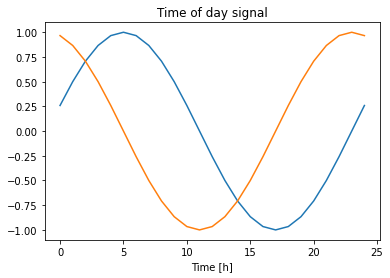

In [71]:
timestamp_s = df.index.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [73]:
import tensorflow as tf

2022-02-03 15:33:21.186405: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-03 15:33:21.186517: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


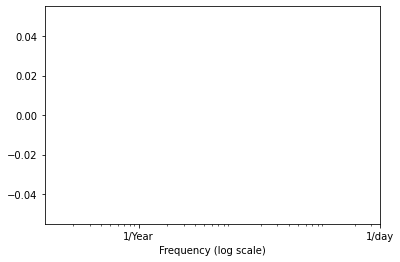

In [75]:
fft = tf.signal.rfft(df['temperatura'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['temperatura'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')


# Aplicar transformaciones

In [2]:
df20 = pd.read_csv('files/procesados/20prepr.csv', parse_dates=['fecha'])
df21 = pd.read_csv('files/procesados/21prepr.csv', parse_dates=['fecha'])

In [3]:
def transform_df(df):
    df.loc[df.temperatura<-25] = np.nan
    df.loc[df.humedad_relativa<0] = np.nan

    wv = df.pop('velocidad_viento')
    wd_rad = df.pop('dir_viento')*np.pi / 180
    df['vientox'] = wv*np.cos(wd_rad)
    df['vientoy'] = wv*np.sin(wd_rad)
    
    return df

In [4]:
df20 = transform_df(df20)
df21 = transform_df(df21)

df20.to_csv('files/procesados/20proc.csv', index=False)
df21.to_csv('files/procesados/21proc.csv', index=False)

In [5]:
df21.head()

,estacion,fecha,temperatura,humedad_relativa,presion_barometrica,radiacion_solar,precipitacion,vientox,vientoy
0,107.0,2021-01-01 01:00:00,1.3,89.0,933.0,0.0,0.0,-0.738289,-0.597854
1,110.0,2021-01-01 01:00:00,3.8,87.0,NaN,NaN,NaN,NaN,NaN
2,16.0,2021-01-01 01:00:00,NaN,93.0,NaN,NaN,NaN,NaN,NaN
3,59.0,2021-01-01 01:00:00,3.6,88.0,931.0,1.0,0.0,-0.983339,-0.338591
4,4.0,2021-01-01 01:00:00,3.5,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df20.head()

,estacion,fecha,temperatura,humedad_relativa,presion_barometrica,radiacion_solar,precipitacion,vientox,vientoy
0,18.0,2020-01-01 01:00:00,3.1,NaN,NaN,NaN,NaN,NaN,NaN
1,24.0,2020-01-01 01:00:00,1.1,97.0,955.0,1.0,0.0,-0.163056,0.608533
2,38.0,2020-01-01 01:00:00,6.3,88.0,NaN,NaN,NaN,NaN,NaN
3,106.0,2020-01-01 01:00:00,-3.2,99.0,961.0,0.0,0.0,0.000000,-0.000000
4,115.0,2020-01-01 01:00:00,3.1,91.0,NaN,NaN,NaN,NaN,NaN
